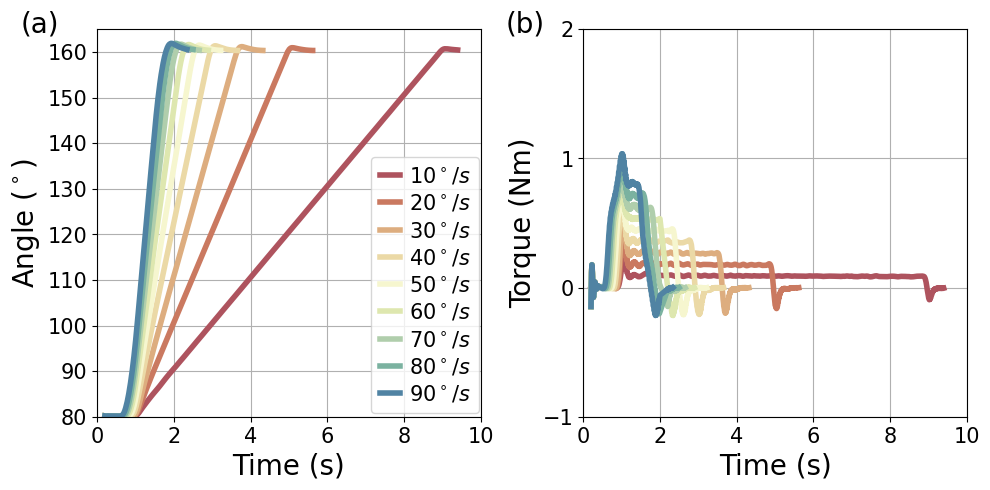

In [ ]:
# test code to draw the data_sample figure

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgb

file_path = '../../data/cali_data_0_1.pkl'
simData = pickle.load(open(file_path, 'rb'))

colors = [(166/255, 64/255, 54/255), (240/255, 194/255, 162/255), (65/255, 130/255, 164/255), (53/255, 78/255, 107/255)]
# new_colors = sns.color_palette("blend:#80373f,#354e6b", 9)
new_colors = sns.color_palette("Spectral", 9)

def desaturate_color(color, factor=0.5):
    r, g, b = to_rgb(color)
    gray = (r + g + b) / 3
    r = r * factor + gray * (1 - factor)
    g = g * factor + gray * (1 - factor)
    b = b * factor + gray * (1 - factor)
    return (r, g, b)

new_colors = [desaturate_color(c, factor=0.6) for c in new_colors]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(1, 10):
    skipSamples = 100
    velName = f'v{10*i}'
    simTime = simData[velName]['time'][skipSamples:]
    simAngle = simData[velName]['angle'][skipSamples:]
    simTorque = simData[velName]['torque'][skipSamples:]
    
    start_idx = np.where(simTime >= 2.0)[0][0]
    end_idx = np.where(simTime >= 2.2)[0][0]
    left_time = simTime[start_idx]
    right_time = simTime[end_idx]
    left_force = simTorque[start_idx]
    right_force = simTorque[end_idx]
    simTorque[start_idx:end_idx] = np.interp(simTime[start_idx:end_idx], [left_time, right_time], [left_force, right_force]) 
    
    axs[0].plot(simTime, simAngle, color=new_colors[i-1], linewidth=4, linestyle='-', label='Sim. data', alpha=1)
    # axs[1].plot(simAngle, simTorque, color=colors[3], linewidth=5, linestyle='-', label='Sim. data', alpha=1.1-0.1*i)
    # test code to draw the data_sample figure

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgb

file_path = '../../data/cali_data_0_1.pkl'
simData = pickle.load(open(file_path, 'rb'))

colors = [(166/255, 64/255, 54/255), (240/255, 194/255, 162/255), (65/255, 130/255, 164/255), (53/255, 78/255, 107/255)]
# new_colors = sns.color_palette("blend:#80373f,#354e6b", 9)
new_colors = sns.color_palette("Spectral", 9)

def desaturate_color(color, factor=0.5):
    r, g, b = to_rgb(color)
    gray = (r + g + b) / 3
    r = r * factor + gray * (1 - factor)
    g = g * factor + gray * (1 - factor)
    b = b * factor + gray * (1 - factor)
    return (r, g, b)

new_colors = [desaturate_color(c, factor=0.6) for c in new_colors]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(1, 10):
    skipSamples = 100
    velName = f'v{10*i}'
    simTime = simData[velName]['time'][skipSamples:]
    simAngle = simData[velName]['angle'][skipSamples:]
    simTorque = simData[velName]['torque'][skipSamples:]
    
    start_idx = np.where(simTime >= 2.0)[0][0]
    end_idx = np.where(simTime >= 2.2)[0][0]
    left_time = simTime[start_idx]
    right_time = simTime[end_idx]
    left_force = simTorque[start_idx]
    right_force = simTorque[end_idx]
    simTorque[start_idx:end_idx] = np.interp(simTime[start_idx:end_idx], [left_time, right_time], [left_force, right_force]) 
    
    axs[0].plot(simTime, simAngle, color=new_colors[i-1], linewidth=4, linestyle='-', label='Sim. data', alpha=1)
    # axs[1].plot(simAngle, simTorque, color=colors[3], linewidth=5, linestyle='-', label='Sim. data', alpha=1.1-0.1*i)
    axs[1].plot(simTime, simTorque, color=new_colors[i-1], linewidth=4, linestyle='-', label=f'{10*i}$^\circ/s$', alpha=1)
    
axs[0].set_xlim(0, 10)
axs[0].set_ylim(80, 165)
axs[0].set_xlabel('Time (s)', fontsize=20)
axs[0].set_ylabel('Angle ($^\circ$)', fontsize=20)
axs[0].tick_params(axis='both', labelsize=15)
axs[0].grid(True, linestyle='-', alpha=1)
axs[0].text(-0.1, 1.05, '(a)', transform=axs[0].transAxes, fontsize=20, va='top', ha='right')
# axs[0].legend()

# axs[1].set_xlim(80, 160)
# axs[1].set_ylim(-4, 5)
# axs[1].set_xlabel('Angle (deg)', fontsize=20)
# axs[1].set_ylabel('Torque (Nm)', fontsize=20)
axs[1].set_xlim(0, 10)
axs[1].set_ylim(-1, 2)
axs[1].set_xlabel('Time (s)', fontsize=20)
axs[1].set_ylabel('Torque (Nm)', fontsize=20)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].grid(True, linestyle='-', alpha=1)
axs[1].text(-0.1, 1.05, '(b)', transform=axs[1].transAxes, fontsize=20, va='top', ha='right')
# axs[1].legend()

# norm = mcolors.Normalize(vmin=10, vmax=90)  # set the range of the color bar
# colorBar2 = [((0., (128/255, 55/255, 63/255, 0.8))), ((1., (53/255, 78/255, 107/255, 0.8)))]
# custom_cmap =  mcolors.LinearSegmentedColormap.from_list("custom_cmap", colorBar2)
# sm = ScalarMappable(cmap=custom_cmap, norm=norm)
# sm.set_array([])  # set a empty array to avoid warning
# # add color bar to the second subplot
# cbar2 = plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.03)
# cbar2.ax.tick_params(labelsize=15)
# cbar2.set_label('Stretch velocity (\circ/s)', fontsize=20)

handles, labels = axs[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.8, 0.83), ncol=3, fontsize=15, 
#            columnspacing=1, handlelength=1, handletextpad=0.4, labelspacing=0.3)
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.43, 0.42), ncol=1, fontsize=15, 
            columnspacing=1, handlelength=1, handletextpad=0.4, labelspacing=0.3)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show().plot(simTime, simTorque, color=new_colors[i-1], linewidth=4, linestyle='-', label=f'{10*i}$^\circ/s$', alpha=1)
    
axs[0].set_xlim(0, 10)
axs[0].set_ylim(80, 165)
axs[0].set_xlabel('Time (s)', fontsize=20)
axs[0].set_ylabel('Angle ($^\circ$)', fontsize=20)
axs[0].tick_params(axis='both', labelsize=15)
axs[0].grid(True, linestyle='-', alpha=1)
axs[0].text(-0.1, 1.05, '(a)', transform=axs[0].transAxes, fontsize=20, va='top', ha='right')
# axs[0].legend()

# axs[1].set_xlim(80, 160)
# axs[1].set_ylim(-4, 5)
# axs[1].set_xlabel('Angle (deg)', fontsize=20)
# axs[1].set_ylabel('Torque (Nm)', fontsize=20)
axs[1].set_xlim(0, 10)
axs[1].set_ylim(-1, 2)
axs[1].set_xlabel('Time (s)', fontsize=20)
axs[1].set_ylabel('Torque (Nm)', fontsize=20)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].grid(True, linestyle='-', alpha=1)
axs[1].text(-0.1, 1.05, '(b)', transform=axs[1].transAxes, fontsize=20, va='top', ha='right')
# axs[1].legend()

# norm = mcolors.Normalize(vmin=10, vmax=90)  # set the range of the color bar
# colorBar2 = [((0., (128/255, 55/255, 63/255, 0.8))), ((1., (53/255, 78/255, 107/255, 0.8)))]
# custom_cmap =  mcolors.LinearSegmentedColormap.from_list("custom_cmap", colorBar2)
# sm = ScalarMappable(cmap=custom_cmap, norm=norm)
# sm.set_array([])  # set a empty array to avoid warning
# # add color bar to the second subplot
# cbar2 = plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.03)
# cbar2.ax.tick_params(labelsize=15)
# cbar2.set_label('Stretch velocity (\circ/s)', fontsize=20)

handles, labels = axs[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.8, 0.83), ncol=3, fontsize=15, 
#            columnspacing=1, handlelength=1, handletextpad=0.4, labelspacing=0.3)
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.43, 0.42), ncol=1, fontsize=15, 
            columnspacing=1, handlelength=1, handletextpad=0.4, labelspacing=0.3)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

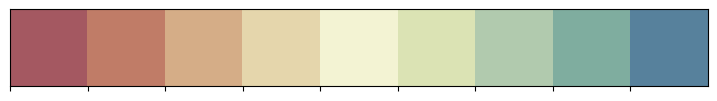

In [ ]:


new_colors = sns.color_palette("Spectral", 9)

def desaturate_color(color, factor=0.5):
    r, g, b = to_rgb(color)
    gray = (r + g + b) / 3
    r = r * factor + gray * (1 - factor)
    g = g * factor + gray * (1 - factor)
    b = b * factor + gray * (1 - factor)
    return (r, g, b)

new_grayish_colors = [desaturate_color(c, factor=0.5) for c in new_colors]

sns.palplot(new_grayish_colors)
plt.show()

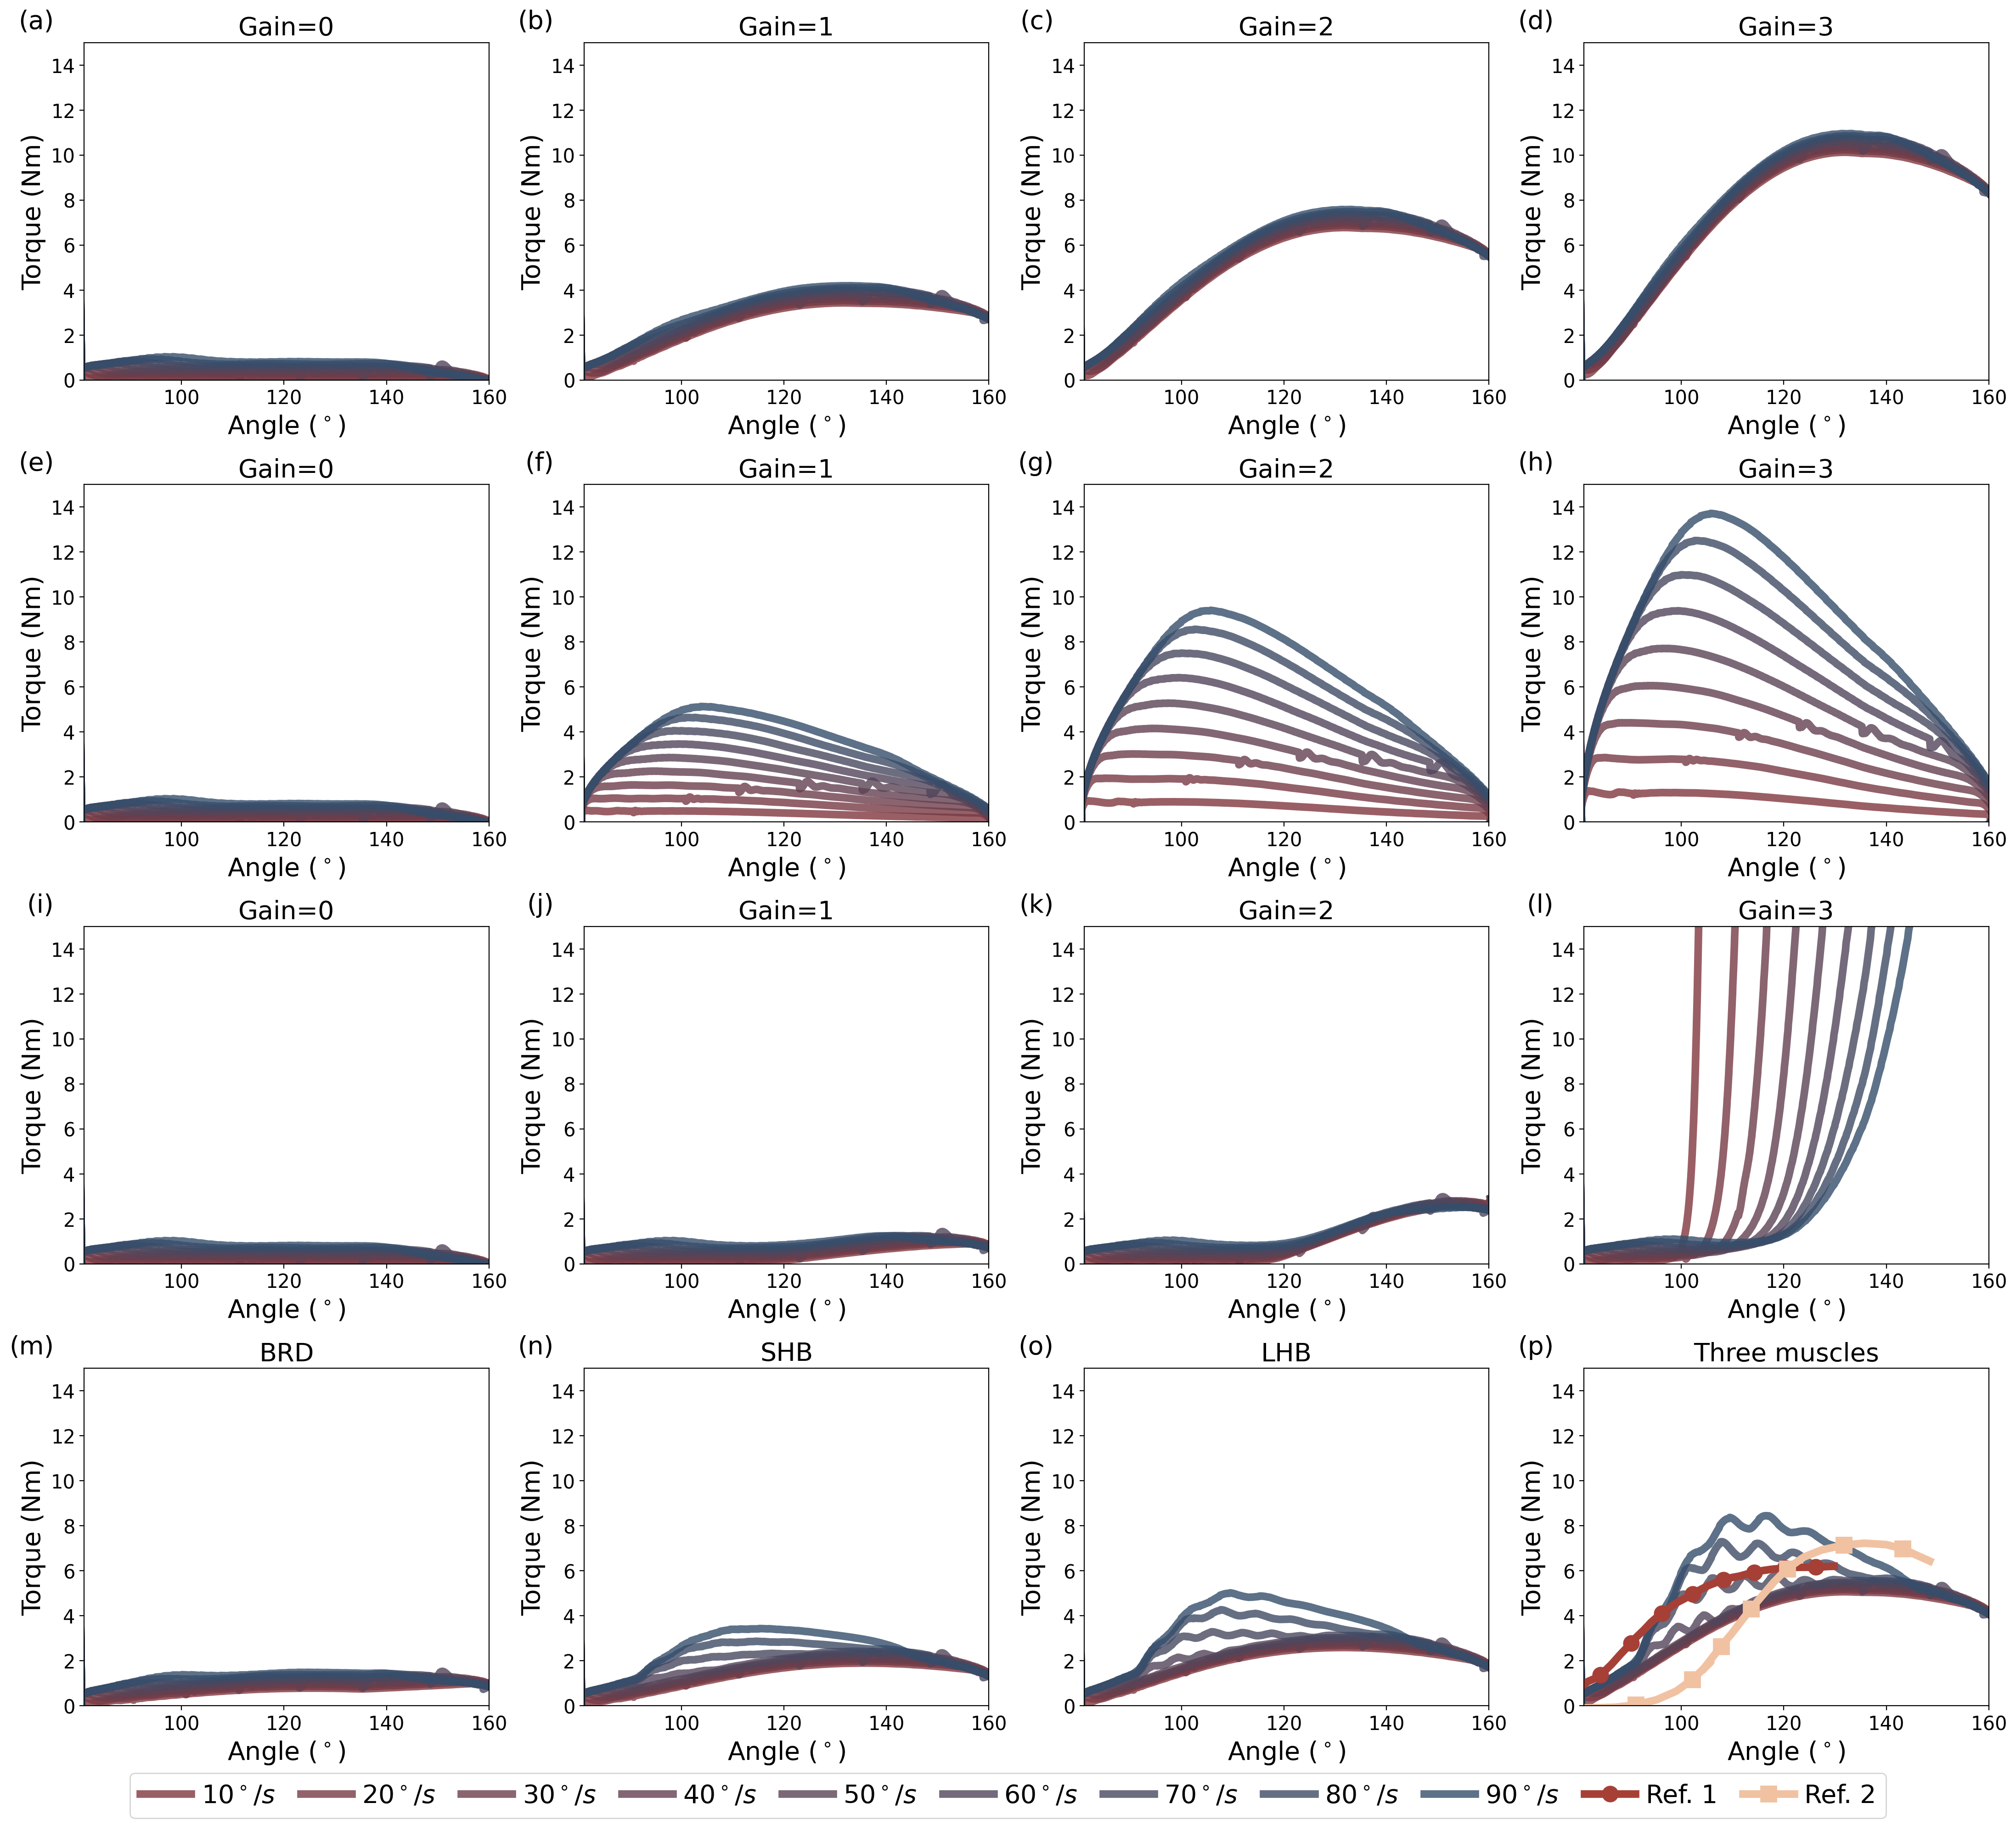

In [ ]:
# the resutls of the simulation experiment
import pickle
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.ndimage import uniform_filter1d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns


fig, axs = plt.subplots(4, 4, figsize=(22, 20), dpi=200)
colors = [(166/255, 64/255, 54/255), (240/255, 194/255, 162/255), (65/255, 130/255, 164/255), (53/255, 78/255, 107/255)]
new_colors = sns.color_palette("blend:#80373f,#354e6b", 9)

model_name = ['ml', 'mv', 'mf']
for row in range(3):
    for index in range(0, 4):
        for i in range(0, 9):
            file_name = '../../data/sim_data1/dataset_' + model_name[row]+ f'_{index}' + f'_{i}'+ '.csv'
            # print(file_name)
            data = pd.read_csv(file_name)
            
            # Convert 'timeVals' and 'jointPos' columns
            data['timeVals'] = data['timeVals'].apply(lambda x: np.array(literal_eval(x)))
            data['jointPos'] = data['jointPos'].apply(lambda x: np.array(literal_eval(x)))    
            # Convert 'perturbation' and 'muscleAct' columns
            data['motorTorque'] = data['motorTorque'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))

            raw_time = np.array(data['timeVals'].tolist())[:,0]
            raw_angle = np.array(data['jointPos'].tolist())[:,0]
            raw_torque= np.array(data['motorTorque'].tolist())
            
            time = np.array([])
            angle = np.array([])
            torque = np.array([])
            for j in range(len(raw_time)):
                time = np.append(time, raw_time[j])
                angle = np.append(angle, 180 - raw_angle[j]*180/np.pi)
                torque = np.append(torque, raw_torque[j])
                
            # axs[row, index].plot(angle, torque, color=colors[row], linewidth=6, linestyle='-', alpha=0.2+0.1*i)
            axs[row, index].plot(angle, torque, color=new_colors[i], linewidth=6, alpha=0.8)
        
        axs[row, index].set_xlim(81, 160)
        axs[row, index].set_ylim(0, 15)
        axs[row, index].set_xlabel('Angle ($^\circ$)', fontsize=20)
        axs[row, index].set_ylabel('Torque (Nm)', fontsize=20)
        axs[row, index].tick_params(axis='both', labelsize=15)
        axs[row, index].xaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
        axs[row, index].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

muscle_type = ['BRA', 'BICS', 'BICL', 'BBB']
for index in range(0, 4):
    for i in range(0, 9):
        file_name = '../../data/sim_data/' + muscle_type[index] + '_lv_3' + f'_{i}'+ '.csv'
        # print(file_name)
        data = pd.read_csv(file_name)
        
        # Convert 'timeVals' and 'jointPos' columns
        data['timeVals'] = data['timeVals'].apply(lambda x: np.array(literal_eval(x)))
        data['jointPos'] = data['jointPos'].apply(lambda x: np.array(literal_eval(x)))    
        # Convert 'perturbation' and 'muscleAct' columns
        data['motorTorque'] = data['motorTorque'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))
        data['muscleAct'] = data['muscleAct'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))

        raw_time = np.array(data['timeVals'].tolist())[:,0]
        raw_angle = np.array(data['jointPos'].tolist())[:,0]
        raw_torque= np.array(data['motorTorque'].tolist())
        raw_act = np.array(data['muscleAct'].tolist())[:,3:]
        
        time = np.array([])
        angle = np.array([])
        torque = np.array([])
        for j in range(len(raw_time)):
            time = np.append(time, raw_time[j])
            angle = np.append(angle, 180 - raw_angle[j]*180/np.pi)
            torque = np.append(torque, raw_torque[j])
            
        axs[3, index].plot(angle, torque, color=new_colors[i], linewidth=6, alpha=0.8, label=f'{10*(i+1)}$^\circ/s$')
        
    axs[3, index].set_xlim(81, 160)
    axs[3, index].set_ylim(0, 15)
    axs[3, index].set_xlabel('Angle ($^\circ$)', fontsize=20)
    axs[3, index].set_ylabel('Torque (Nm)', fontsize=20)
    axs[3, index].tick_params(axis='both', labelsize=15)
    # axs[index].grid(True, linestyle='-', alpha=1)
    axs[3, index].xaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
    axs[3, index].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

file_path = '../../data/ref_data_0.pkl'
refData = pickle.load(open(file_path, 'rb'))
ref_name = 'v91'
refTime = refData[ref_name]['time']
refAngle = refData[ref_name]['angle']
refTorque = refData[ref_name]['torque']
axs[3, 3].plot(refAngle, refTorque*2/3-2, color=colors[0], linewidth=6, linestyle='-', marker='o', markersize=12, markevery=20, label='Ref. 1', alpha=1)

file_path = '../../data/ref_data_1.csv'
refData = pd.read_csv(file_path, header=None)
refAngle = refData[0]
refTorque = refData[1]
plt.plot(refAngle, refTorque, color=colors[1], linewidth=6, linestyle='-', marker='s', markersize=12, markevery=3, label='Ref. 2', alpha=1)

handles, labels = axs[3, 3].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=11, fontsize=20, frameon=True, columnspacing=1, handlelength=2, handletextpad=0.4)


figure_num = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)']
titles1 = ['Gain=0', 'Gain=1', 'Gain=2', 'Gain=3'] 
titles2 = ['BRD', 'SHB', 'LHB', 'Three muscles']
for j in range(4):
    for i, ax in enumerate(axs[j,:]):
        ax.text(-0.075, 1.1, figure_num[i+j*4], transform=ax.transAxes, fontsize=20, va='top', ha='right')
        if j <= 2:
            ax.set_title(titles1[i], fontsize=20)
        else:
            ax.set_title(titles2[i], fontsize=20)
            
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

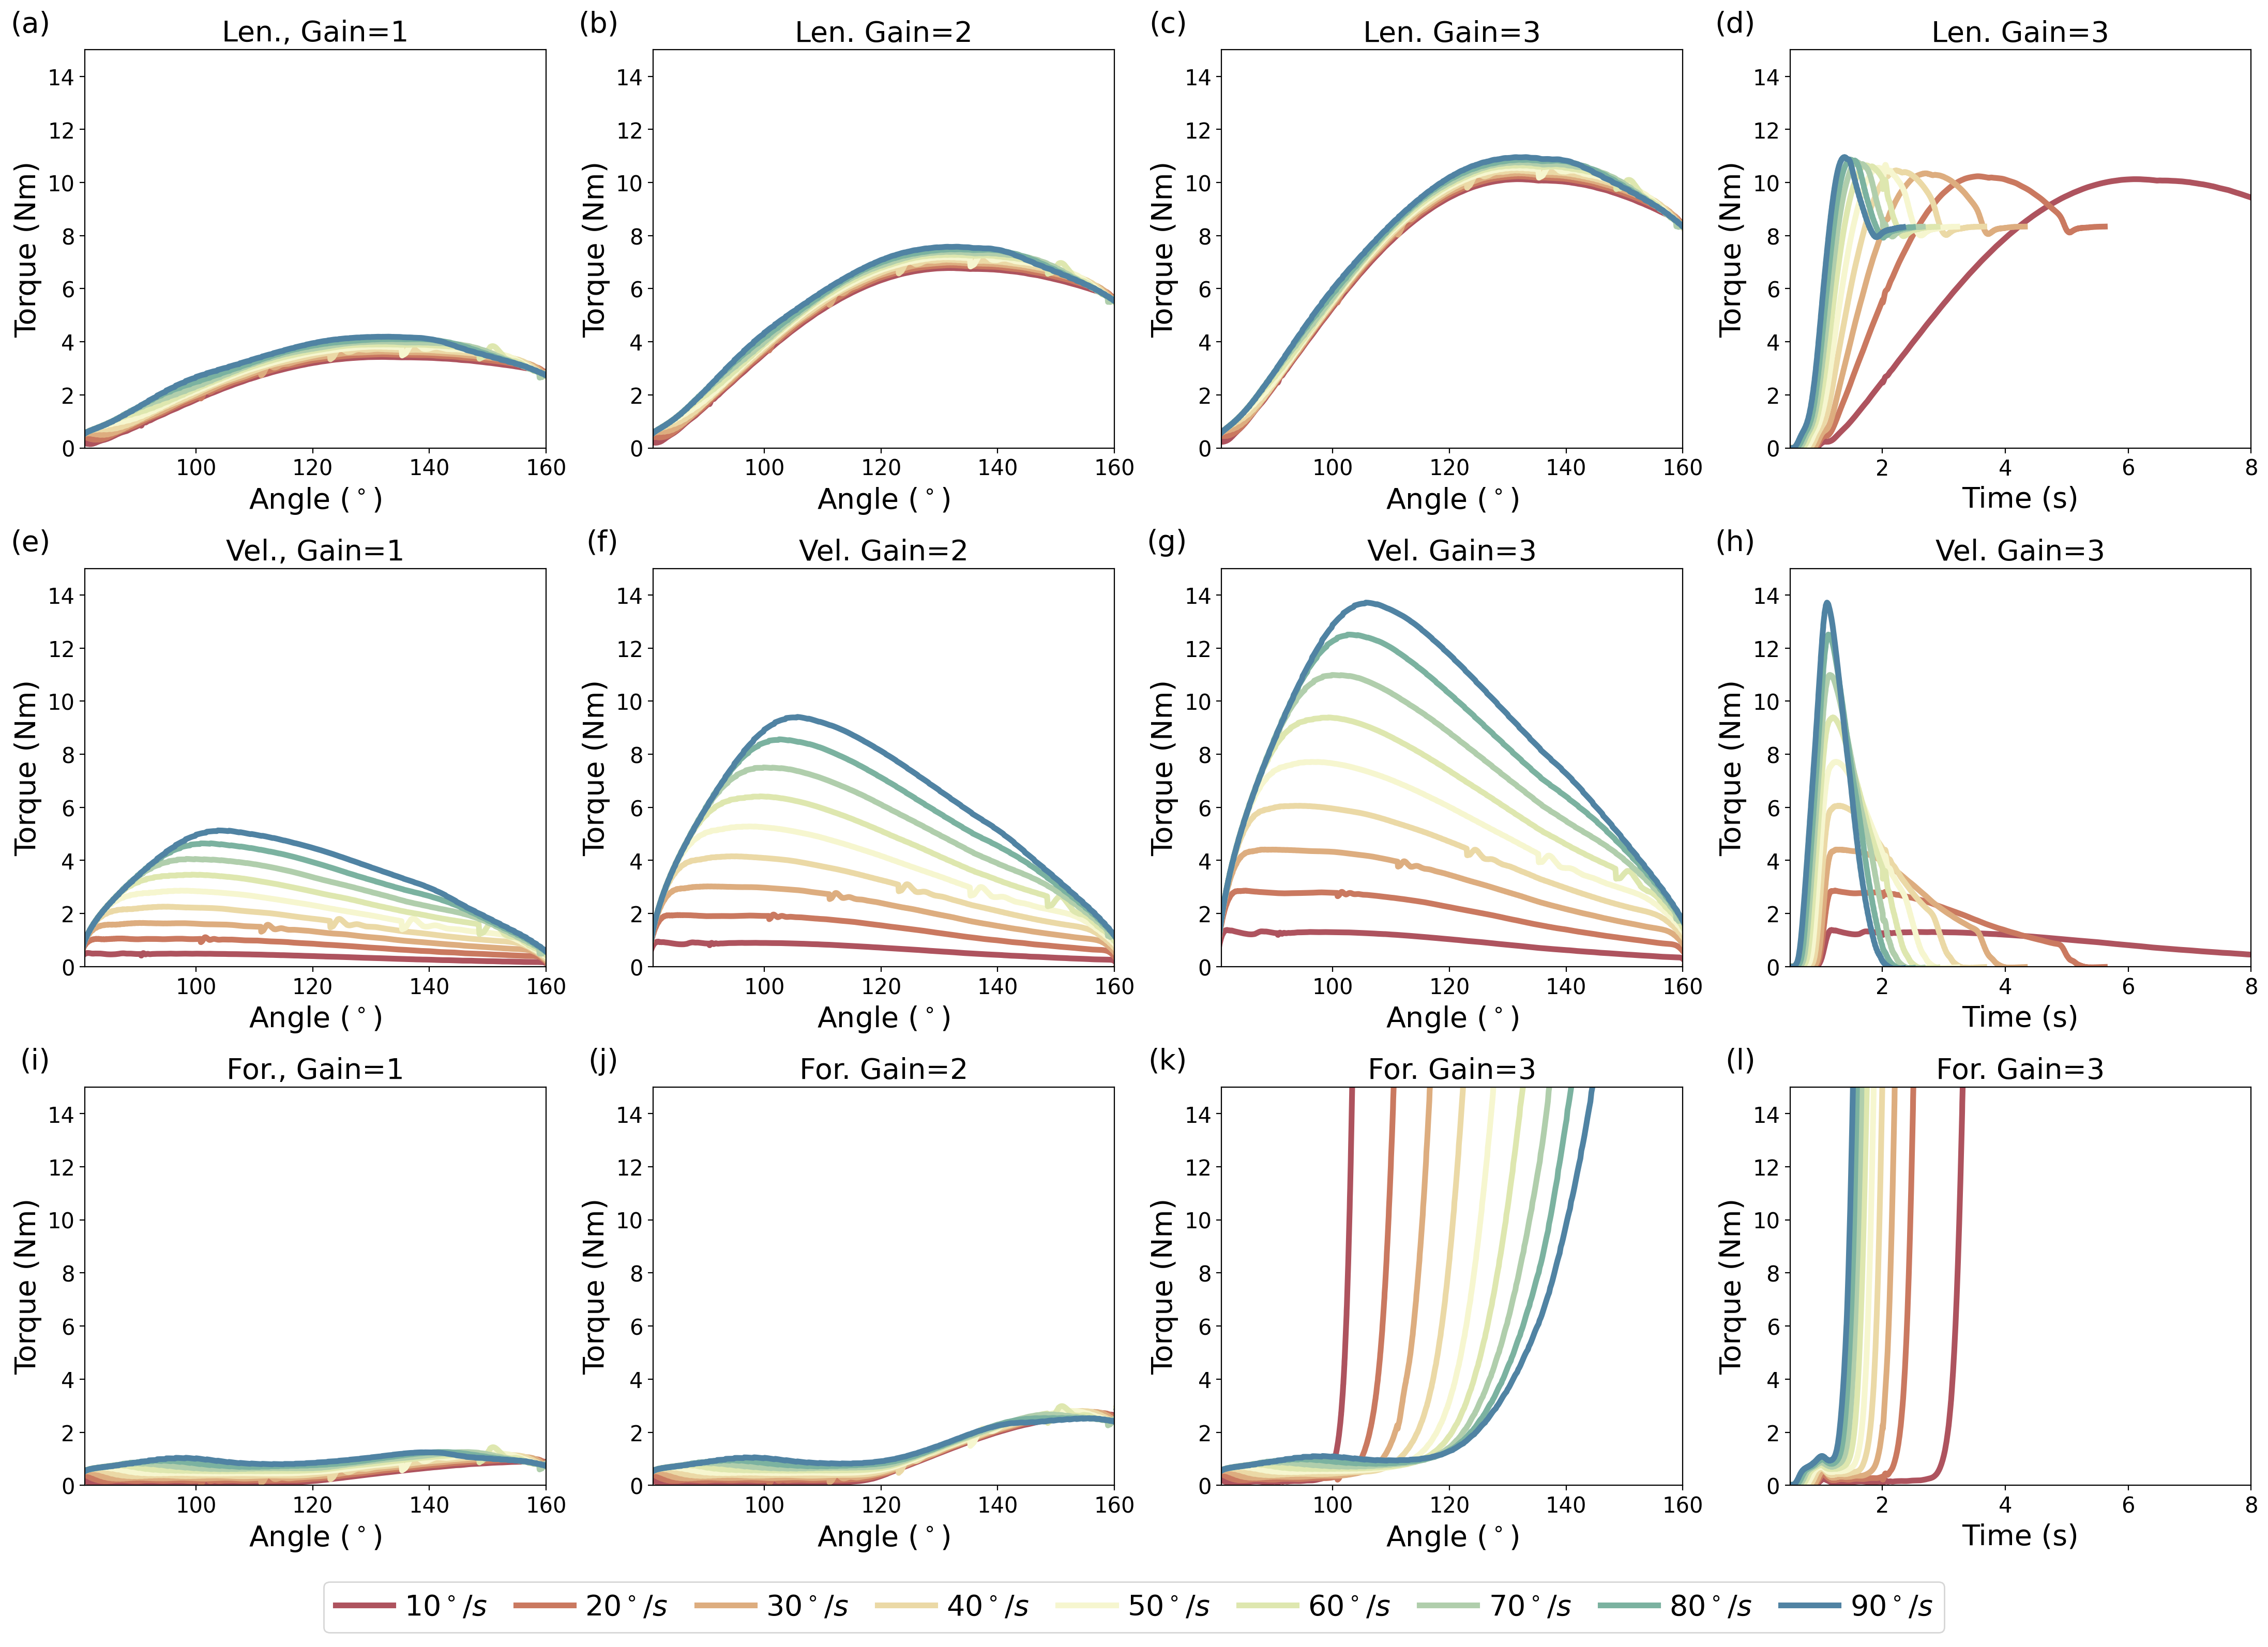

In [ ]:
# the resutls of the simulation experiment
import pickle
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.ndimage import uniform_filter1d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import to_rgb
import seaborn as sns


fig, axs = plt.subplots(3, 4, figsize=(22, 16), dpi=200)
colors = [(166/255, 64/255, 54/255), (240/255, 194/255, 162/255), (65/255, 130/255, 164/255), (53/255, 78/255, 107/255)]
# new_colors = sns.color_palette("blend:#80373f,#354e6b", 9)
new_colors = sns.color_palette("Spectral", 9)

def desaturate_color(color, factor=0.5):
    r, g, b = to_rgb(color)
    gray = (r + g + b) / 3
    r = r * factor + gray * (1 - factor)
    g = g * factor + gray * (1 - factor)
    b = b * factor + gray * (1 - factor)
    return (r, g, b)

new_colors = [desaturate_color(c, factor=0.6) for c in new_colors]

model_name = ['ml', 'mv', 'mf']
for row in range(3):
    for index in range(0, 4):
        if index == 3:
                for i in range(0, 9):
                        file_name = '../../data/sim_data1/dataset_' + model_name[row]+ f'_{index}' + f'_{i}'+ '.csv'
                        # print(file_name)
                        data = pd.read_csv(file_name)
                        
                        # Convert 'timeVals' and 'jointPos' columns
                        data['timeVals'] = data['timeVals'].apply(lambda x: np.array(literal_eval(x)))
                        data['jointPos'] = data['jointPos'].apply(lambda x: np.array(literal_eval(x)))    
                        # Convert 'perturbation' and 'muscleAct' columns
                        data['motorTorque'] = data['motorTorque'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))

                        raw_time = np.array(data['timeVals'].tolist())[:,0]
                        raw_angle = np.array(data['jointPos'].tolist())[:,0]
                        raw_torque= np.array(data['motorTorque'].tolist())
                        
                        time = np.array([])
                        angle = np.array([])
                        torque = np.array([])
                        for j in range(len(raw_time)):
                                time = np.append(time, raw_time[j])
                                torque = np.append(torque, raw_torque[j])
                                
                        axs[row, index].plot(time, torque, color=new_colors[i], linewidth=4, alpha=1,label=f'{10*(i+1)}$^\circ/s$')
                        # axs[row, index].plot(angle, torque, color=new_colors[i], linewidth=6, alpha=0.8)
                
                axs[row, index].set_xlim(0.5, 8)
                axs[row, index].set_ylim(0, 15)
                axs[row, index].set_xlabel('Time (s)', fontsize=20)
                axs[row, index].set_ylabel('Torque (Nm)', fontsize=20)
                axs[row, index].tick_params(axis='both', labelsize=15)
                axs[row, index].xaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
                axs[row, index].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
                
        else:   
                for i in range(0, 9):
                        file_name = '../../data/sim_data1/dataset_' + model_name[row]+ f'_{index+1}' + f'_{i}'+ '.csv'
                        # print(file_name)
                        data = pd.read_csv(file_name)
                        
                        # Convert 'timeVals' and 'jointPos' columns
                        data['timeVals'] = data['timeVals'].apply(lambda x: np.array(literal_eval(x)))
                        data['jointPos'] = data['jointPos'].apply(lambda x: np.array(literal_eval(x)))    
                        # Convert 'perturbation' and 'muscleAct' columns
                        data['motorTorque'] = data['motorTorque'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))

                        raw_time = np.array(data['timeVals'].tolist())[:,0]
                        raw_angle = np.array(data['jointPos'].tolist())[:,0]
                        raw_torque= np.array(data['motorTorque'].tolist())
                        
                        time = np.array([])
                        angle = np.array([])
                        torque = np.array([])
                        for j in range(len(raw_time)):
                                angle = np.append(angle, 180 - raw_angle[j]*180/np.pi)
                                torque = np.append(torque, raw_torque[j])
                                
                        # axs[row, index].plot(angle, torque, color=colors[row], linewidth=6, linestyle='-', alpha=0.2+0.1*i)
                        axs[row, index].plot(angle, torque, color=new_colors[i], linewidth=4, alpha=1)
                
                axs[row, index].set_xlim(81, 160)
                axs[row, index].set_ylim(0, 15)
                axs[row, index].set_xlabel('Angle ($^\circ$)', fontsize=20)
                axs[row, index].set_ylabel('Torque (Nm)', fontsize=20)
                axs[row, index].tick_params(axis='both', labelsize=15)
                axs[row, index].xaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
                axs[row, index].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

figure_num = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)']
titles1 = ['Len., Gain=1', 'Len. Gain=2', 'Len. Gain=3','Len. Gain=3'] 
titles2 = ['Vel., Gain=1', 'Vel. Gain=2', 'Vel. Gain=3','Vel. Gain=3']
titles3 = ['For., Gain=1', 'For. Gain=2', 'For. Gain=3','For. Gain=3']
titles4 = ['BRD', 'SHB', 'LHB', 'Three muscles']
for j in range(3):
    for i, ax in enumerate(axs[j,:]):
        ax.text(-0.075, 1.1, figure_num[i+j*4], transform=ax.transAxes, fontsize=20, va='top', ha='right')
        if j == 0:
                ax.set_title(titles1[i], fontsize=20)
        elif j == 1:
                ax.set_title(titles2[i], fontsize=20)
        elif j == 2:
                ax.set_title(titles3[i], fontsize=20)
        else:
                ax.set_title(titles4[i], fontsize=20)
                
handles, labels = axs[2, 3].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=11, fontsize=20, frameon=True, columnspacing=1, handlelength=2, handletextpad=0.4)
        
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()



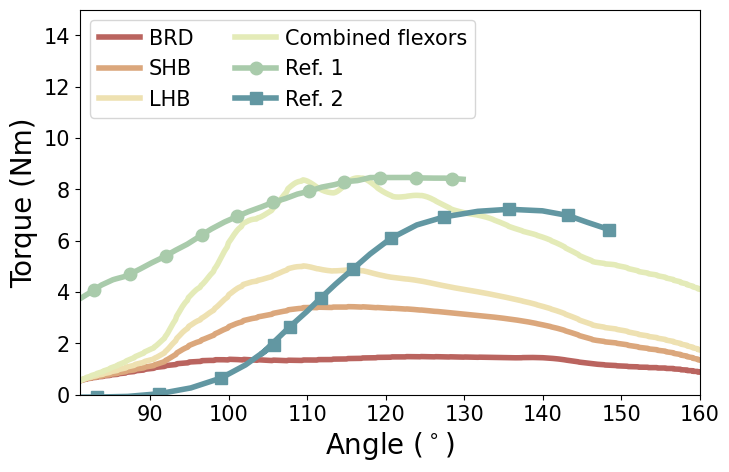

In [1]:
import pickle
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.ndimage import uniform_filter1d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import to_rgb
import seaborn as sns

muscle_type = ['BRA', 'BICS', 'BICL', 'BBB']
lines = ['BRD', 'SHB', 'LHB', 'Combined flexors']

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgb

colors = [(166/255, 64/255, 54/255), (240/255, 194/255, 162/255), (65/255, 130/255, 164/255), (53/255, 78/255, 107/255)]
new_colors = sns.color_palette("Spectral", 6)

def desaturate_color(color, factor=0.5):
    r, g, b = to_rgb(color)
    gray = (r + g + b) / 3
    r = r * factor + gray * (1 - factor)
    g = g * factor + gray * (1 - factor)
    b = b * factor + gray * (1 - factor)
    return (r, g, b)

new_colors = [desaturate_color(c, factor=0.6) for c in new_colors]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for i in range(0, 4):
    file_name = '../../data/sim_data1/' + muscle_type[i] + '_lv_3_8'+ '.csv'
    # print(file_name)
    data = pd.read_csv(file_name)
    
    # Convert 'timeVals' and 'jointPos' columns
    data['timeVals'] = data['timeVals'].apply(lambda x: np.array(literal_eval(x)))
    data['jointPos'] = data['jointPos'].apply(lambda x: np.array(literal_eval(x)))    
    # Convert 'perturbation' and 'muscleAct' columns
    data['motorTorque'] = data['motorTorque'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))
    data['muscleAct'] = data['muscleAct'].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))

    raw_time = np.array(data['timeVals'].tolist())[:,0]
    raw_angle = np.array(data['jointPos'].tolist())[:,0]
    raw_torque= np.array(data['motorTorque'].tolist())
    raw_act = np.array(data['muscleAct'].tolist())[:,3:]
    
    time = np.array([])
    angle = np.array([])
    torque = np.array([])
    for j in range(len(raw_time)):
        time = np.append(time, raw_time[j])
        angle = np.append(angle, 180 - raw_angle[j]*180/np.pi)
        torque = np.append(torque, raw_torque[j])
        
    ax.plot(angle, torque, color=new_colors[i], linewidth=4, alpha=1, label=lines[i])
        
    ax.set_xlim(81, 160)
    ax.set_ylim(0, 15)
    ax.set_xlabel('Angle ($^\circ$)', fontsize=20)
    ax.set_ylabel('Torque (Nm)', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    # axs[index].grid(True, linestyle='-', alpha=1)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

file_path = '../../data/ref_data_0.pkl'
refData = pickle.load(open(file_path, 'rb'))
ref_name = 'v91'
refTime = refData[ref_name]['time']
refAngle = refData[ref_name]['angle']
refTorque = refData[ref_name]['torque']
ax.plot(refAngle, refTorque, color=new_colors[-2], linewidth=4, linestyle='-', marker='o', markersize=9, markevery=25, label='Ref. 1', alpha=1)

file_path = '../../data/ref_data_1.csv'
refData = pd.read_csv(file_path, header=None)
refAngle = refData[0]
refTorque = refData[1]
ax.plot(refAngle, refTorque, color=new_colors[-1], linewidth=4, linestyle='-', marker='s', markersize=9, markevery=2, label='Ref. 2', alpha=1)

legend = ax.legend(loc='upper left', fontsize=15, ncol=2, frameon=True, handlelength=2, handletextpad=0.4)